(ch_dimensionality)=
# Dimensionality Reduction

## Introduction to Dimensionality Reduction

In the field of data science, we frequently encounter multi-dimensional data. Dimensional here simply means that each data point comprises multiple variables or features. While we can represent and manipulate such data in tabular form, visual and computational challenges arise as the number of dimensions increases.

### The Challenge of High-Dimensional Data

Consider data that include age, weight, and height. This can still be visually represented in a 3D scatter plot. But what happens when we introduce additional variables such as working hours, income, wealth, and eye color? We could add a few more dimensions to the plot by using color or size of the symbols. At some point, however, representing all these variables simultaneously in a single plot becomes unfeasible.

This leads us to a broader issue known as the **curse of dimensionality**. This concept refers to the exponential increase in volume associated with adding extra dimensions to Euclidean space. For example, representing 100 elevation points along a 100m line is straightforward. However, describing a 100m x 100m area requires 10,000 points for the same resolution, and the complexity only grows as more dimensions are added.

### Practical Implications

With a thousand data points, it's relatively simple to cover a 2D or 3D space adequately, capturing diverse combinations of age, weight, and height. However, if each of these data points features 20 additional properties, like income, shoe size, and eye color, the number of data points required to adequately describe this 23-dimensional space increases dramatically. This vast expansion in dimensionality makes it challenging to find closely matching profiles in the dataset. For instance, two people might share similar basic physical characteristics, but differ significantly across other dimensions such as income or vacation days.

Thus, high dimensionality not only complicates the graphical representation of data but also poses significant challenges in areas like clustering and predictive modeling. As dimensions increase, data points tend to become sparser, leading to overfitting in machine learning models and a general decrease in model performance.

```{figure} ../images/fig_curse_of_dimensionality_01.png
:name: fig_dimensionality_reduction01

In many cases, we will work with data that has more than just 2 or 3 relevant features (or: dimensions). While age, weight, and height might all be of interest when we analyze a dataset of people, it is not very likely that this will be sufficient to reveal very interesting patterns. We can easily plot 2 or 3 features (see (a)). But what do we do if we want to add additional features, maybe even *many* additional features?
The *curse of dimensionality* can be understood by imagining that we have to fully explore a feature space. 2D and 3D are relatively straightforward, but when we have to cover a much higher dimensional space, we simply need far too many datapoints to *cover* this space reasonably well (see (b)).
```

### The Role of Dimensionality Reduction

To address these challenges, **dimensionality reduction** techniques are employed extensively in data science. These techniques strive to retain the most critical information in the data while reducing the number of dimensions involved. This can be viewed as a form of data compression that simplifies large datasets, making them easier to explore and analyze.

Dimensionality reduction is beneficial not only for simplifying data visualization but also for enhancing the performance of analytical models by reducing the computational burden and minimizing the risk of overfitting.

Luckily, we -as (future) data scientists- can make use of a wide variety of powerful techniques to reduce the number of our feature dimensions. In this chapter, we will focus on a few common techniques which fall into different categories of algorithms as shown in {numref}`fig_dimensionality_reduction_techniques`. There are, however, plenty of other methods that we cannot cover here, see for instance {cite}`anowar2021conceptual` or {cite}`wang2021dimensionreduction`.

Before we start looking at the different methods, a brief warning: In nearly all cases, dimensionality reduction comes with a **trade-off between reduction of dimensions and information loss**. No matter which method we use to reduce 20-dimensional data to 2-dimensional data, some information will be lost in the process.

```{figure} ../images/fig_dimensionality_reduction_techniques.png
:name: fig_dimensionality_reduction_techniques

There are many different approaches to reducing the number of feature dimensions in data. **Feature selection** techniques aim at picking a subset of original features without transformation. **Feature extraction** techniques transform original features into a lower-dimensional space while capturing important information. Two important categories for such extraction processes are *projection-based* and *manifold-learning* and in each category we can find numerous, often very different, algorithms, a few of which are listed in this figure.
```

## Feature Selection

A variant of dimensionality reduction is **feature selection**, which involves identifying and removing less important features for a specific task. Common methods include:

- **High Correlation Filter**: Removes features that are highly correlated with others, reducing redundancy.
- **Low Variance Filter**: Eliminates features that show little variation, which are presumed to contribute less information.
- **Missing Value Threshold**: Discards features with too many missing values, which might undermine model reliability.
- **Feature Importance from Models**: Utilizes models like Random Forest to identify and keep the most informative features.

Feature selection methods offer the advantage of simplicity and interpretability. No abstract features are created, and the results are usually straightforward and easy to replicate.

However, in practice, especially with high-dimensional data, the drawbacks often outweigh these advantages. For one, feature selection typically achieves only modest data compression, meaning that even large datasets retain many dimensions. Moreover, determining which features are important can be challenging, requiring extensive domain knowledge and a clear understanding of the questions being addressed.

## Feature Extraction 1: Feature Projection

**Feature extraction** involves transforming original features into a lower-dimensional space. This transformation can be designed to retain as much of the important information as possible while reducing dimensionality. One popular category of feature extraction is **feature projection**.

### Feature Projection

Feature projection techniques aim to map high-dimensional data onto a lower-dimensional space through a linear or non-linear transformation, focusing on maintaining the integrity of the data's structure as much as possible.

- **Linear Projections**:
  - **Principal Component Analysis (PCA)**: Reduces dimensionality by transforming features into a new coordinate system, where the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
  - **Linear Discriminant Analysis (LDA)**: Seeks directions that maximize the separation between multiple classes.
- **Non-linear Projections**:
  - **Kernel PCA**: Extends PCA to non-linear dimension reduction through the use of kernels, allowing the algorithm to perform complex mappings that linear methods cannot.

These projection methods can be highly effective for pattern recognition and machine learning tasks where the intrinsic dimensionality of the data is lower than the number of measured variables. They are particularly valuable when the goal is to simplify the data without losing critical information, facilitating faster and more efficient processing.

### PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is a cornerstone technique in dimensionality reduction, used extensively to simplify the complexity inherent in multi-dimensional data. This simplification aids in improving data interpretability, visualizations, and can even enhance the performance of machine learning algorithms by eliminating noise and redundancy. Below we detail the mechanisms of PCA and its practical application.

#### Concept

PCA systematically transforms the original correlated features into a new set of uncorrelated features, called principal components, ordered so that the first few retain most of the variation present in all of the original dimensions.

**Key steps in PCA:**

1. **Standardization**:

   - **Purpose**: PCA is affected by the scale of the features, as features with larger scales dominate the variance. Thus, standardizing the data (giving each feature zero mean and unit variance) ensures that each feature contributes equally.

   - **Method**:

     Each feature $x_i$ of the dataset is transformed as follows:

     $$x_i' = \frac{x_i − \mu_i}{\sigma_i}$$

     where $\mu_i$ is the mean and $\sigma_i$ is the standard deviation of the feature $x_i$.

2. **Covariance Matrix Computation**:

   - **Purpose**: The covariance matrix captures the pairwise covariances of features and reflects how changes in one feature correspond with changes in another.

   - **Method**:

     $$
     \Sigma  = \frac{1}{n-1} \left( X - \bar{X} \right)^T \left( X - \bar{X} \right)
     $$

     where $X$ is the feature matrix and $\bar{X}$ is the matrix of feature means.

3. **Eigenvalue Decomposition**:

   - **Purpose**: Decomposing the covariance matrix to extract its eigenvalues and eigenvectors identifies the new axes (principal components) that maximize the variance of the data when projected onto them.

   - **Method**:
     Solve the equation $\Sigma v = \lambda v$, where $\lambda$ represents the eigenvalues, and $v$ represents the corresponding eigenvectors. The eigenvectors define the directions of the new space, and the eigenvalues define their magnitude, indicating the amount of variance carried in each principal component.

4. **Selection of Principal Components**:

   - **Criteria**: Principal components are selected based on the magnitude of their eigenvalues in descending order. Components with the highest eigenvalues are chosen because they capture the most variance of the data set.
   - **Outcome**: The first few principal components often capture the majority of the variation, allowing for a significant reduction in dimensionality without substantial loss of information.

#### Practical Example with Python

We'll create a 2D dataset and apply PCA to reduce it to 1D. First, we'll generate a synthetic dataset.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Generating Synthetic Data

Let's create a dataset of 2 features with a clear linear relationship.

In [2]:
# Generating a synthetic 2D dataset
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.8], [0.8, 1]], size=200)

# Standardizing the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Applying PCA

We will then standardize this data and apply PCA to reduce its dimensionality.
To inspect the results, we will use a simple scatter plot visualization.

In [3]:
# Applying PCA to reduce dimensionality from 2D to 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

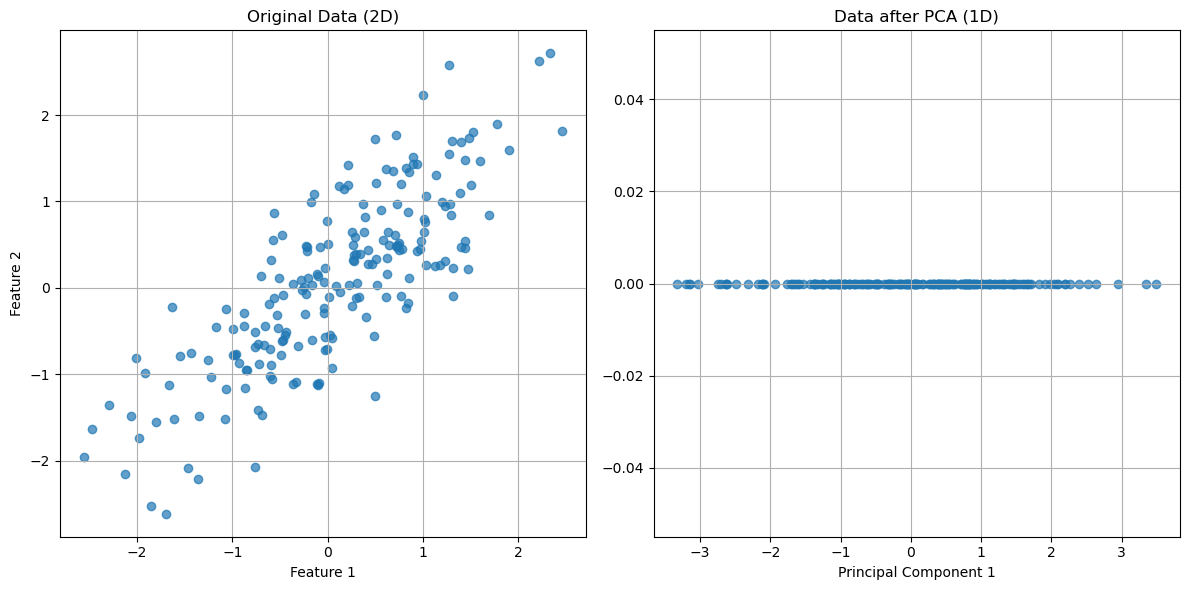

In [4]:
# Plotting the original data and the principal component
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original Data (before PCA)
ax1.scatter(X[:, 0], X[:, 1], alpha=0.7)
ax1.set_title("Original Data (2D)")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.grid(True)

# Data after PCA transformation
ax2.scatter(X_pca[:, 0], np.zeros(len(X_pca)), alpha=0.7)
ax2.set_title("Data after PCA (1D)")
ax2.set_xlabel("Principal Component 1")
ax2.grid(True)

plt.tight_layout()
plt.show()

In the figures above, we can see a clear demonstration of PCA in action:

1. Original Data (2D): The left plot shows our synthetic 2D dataset. The dataset exhibits a linear relationship between the two features, making it a good candidate for PCA.

2. Data after PCA (1D): The right plot shows the data after applying PCA and reducing its dimensionality to 1D. This plot represents the projection of the original data onto the first principal component. This principal component is a line that best represents the variance in the dataset.

By transforming the data onto this principal component, we've effectively reduced its dimensionality while retaining the most important variance in the data. PCA has simplified the dataset, making it easier to analyze and visualize, and potentially improving the efficiency and performance of subsequent data processing or machine learning algorithms. ​
​

### Use Case: Marketing Analysis (with PCA)
Let's now move to a more realistic use case to show what the dimensionality reduction method can be used for.
In the following part, we will look at data from a marketing campaign, or more generally, data from an online store ([link to the dataset](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset)). In the first step, we will import and inspect the data. Then, we will clean and process the data a little before we can actually apply `PCA` to reduce the data to two dimensions.

#### Data import and inspection

In [5]:
path_data = "../datasets/"
filename = "superstore_data.csv"

data = pd.read_csv(os.path.join(path_data, filename))
data = data.set_index("Id")
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


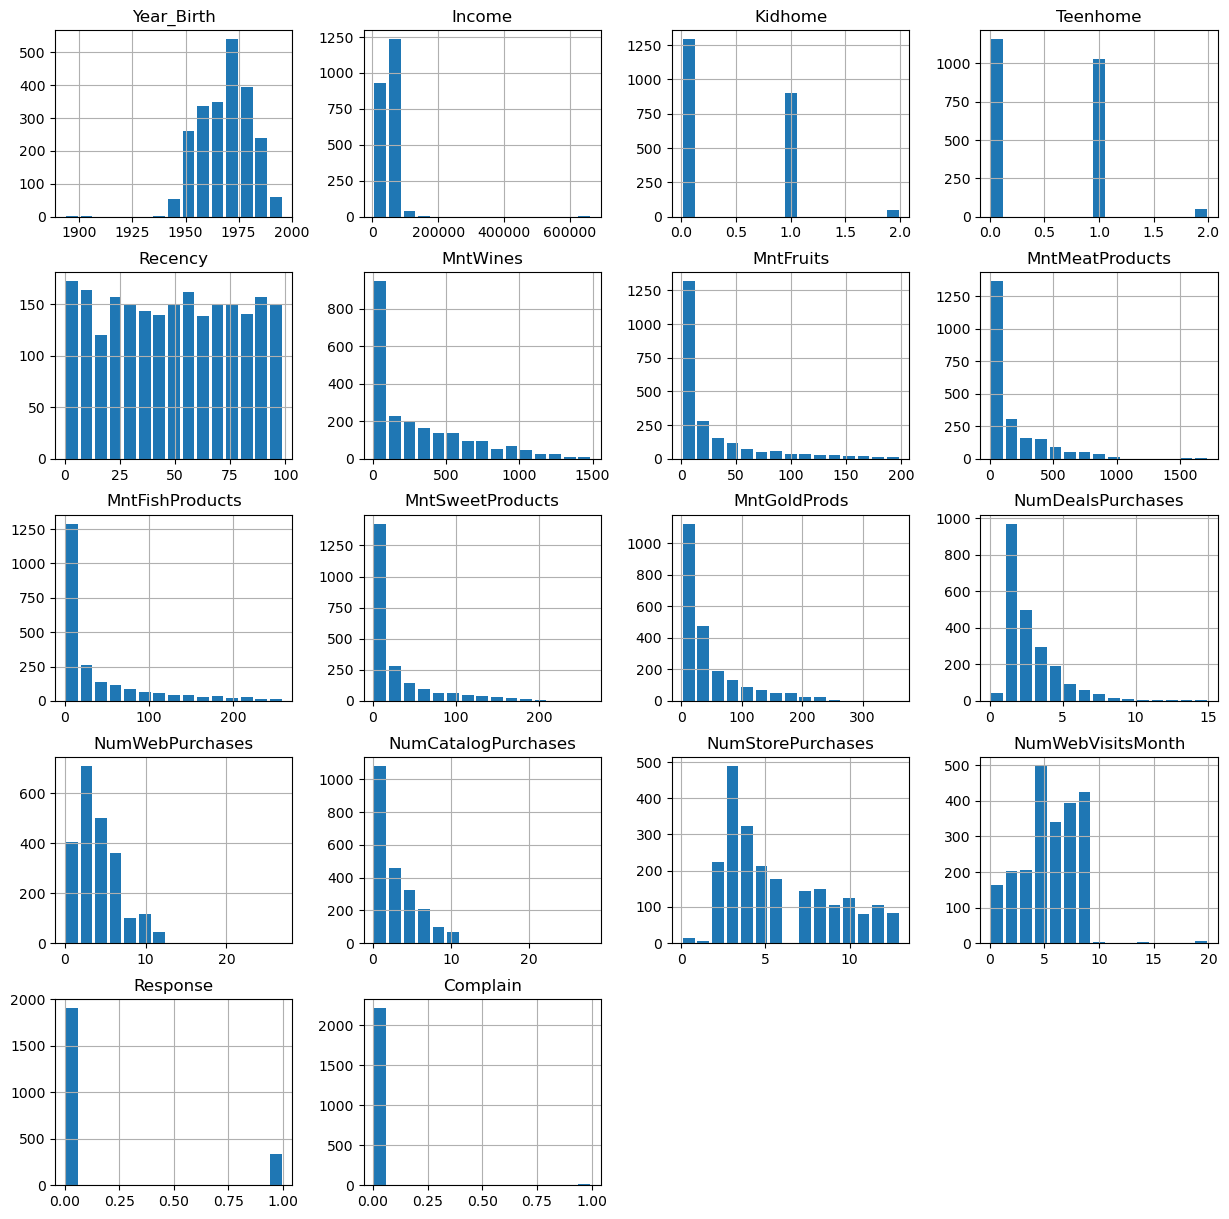

In [6]:
data.hist(figsize=(15, 15), bins=15, rwidth=0.8)
plt.show()

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 1826 to 4070
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int

#### Data cleaning
Some values appear weird, for instance in the column `Year_Birth`. In addition, we might want to remove some "outliers", i.e., rare cases in which we might not be so interested. Here, this could be the few people with enormously high incomes (independent of whether those values are true or not...).

In [8]:
mask = (data["Income"] < 150000) & (data["Year_Birth"] >= 1925)
data = data[mask]
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


Here, we also use some **feature manipulation** to change features into a easier-to-interpret form (age) or to compute additional quantities that we expect to be relevant.

In [9]:
#Age of customer today 
data["Age"] = 2020 - data["Year_Birth"]  # which year to start?!

#Total spendings on various items
data["Spent"] = data.iloc[:, 8:14].sum(axis=1)

#Dropping some of the redundant features
to_drop = ["Year_Birth"]
data = data.drop(to_drop, axis=1)

#### Data processing

Dimensionality reduction techniques such as PCA require numerical data, which is not very surprising given how the method works (see above).
The most common pitfall, however, is that **PCA is extremely sensitive to the scaling of the data**. It looks for the features with the largest variance, so imagine that one feature is income, which can have values of many 10,000s and another feature is age, which will usually stay below 100. Then PCA will virtually ignore the feature "age" in comparison to the much higher values of the feature "income". To circumvent this undesirable effect, the data needs to be **scaled so that all features show comparable ranges**.

Here, we will use the Scikit-Learn `StandardScaler` for this task.

In [10]:
from sklearn.preprocessing import StandardScaler

# Creating a copy of data (with only numerical values)
data_numerical = data.copy().select_dtypes(include='number')

# Creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_remove = ["Complain", "Response"]
data_numerical = data_numerical.drop(cols_remove, axis=1)

# Scaling
scaler = StandardScaler()
scaler.fit(data_numerical)
data_scaled = pd.DataFrame(scaler.transform(data_numerical),
                           columns= data_numerical.columns )

In [11]:
data_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent
0,1.603840,-0.823405,-0.930767,-1.694318,-0.347240,1.950872,0.981413,1.336263,3.936458,3.362873,-0.699147,-0.036788,0.484147,0.054432,-1.797341,-0.093624,0.969477
1,0.264092,-0.823405,-0.930767,-1.694318,0.467775,-0.538100,-0.465299,-0.561124,-0.659718,-0.136437,-0.699147,1.059382,0.126750,0.362973,-0.139645,0.675400,-0.049576
2,0.755487,-0.823405,0.906602,-1.694318,-0.510242,-0.387253,-0.488263,-0.415171,-0.611081,-0.271770,-0.699147,-0.402177,-0.230646,-0.254109,-1.382917,0.931742,-0.591519
3,-0.924655,1.038757,0.906602,-1.694318,-0.877740,-0.663806,-0.754642,-0.688833,-0.659718,-0.851766,-0.699147,-1.132957,-0.945440,-1.179732,0.689203,0.162718,-0.990496
4,-1.455841,1.038757,-0.930767,-1.694318,-0.889595,-0.261548,-0.649009,-0.488148,-0.659718,-0.194437,-0.168834,-0.402177,-0.588043,-1.179732,0.689203,-1.717119,-0.857504


Finally, we can compute the PCA components for our data:

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(data_scaled)
X_pca = pca.transform(data_scaled)
X_pca.shape

(2205, 2)

As we see, the data (2205 datapoints) is now reduced to two dimensions. We will use these two dimensions to plot all datapoints using a scatter plot.

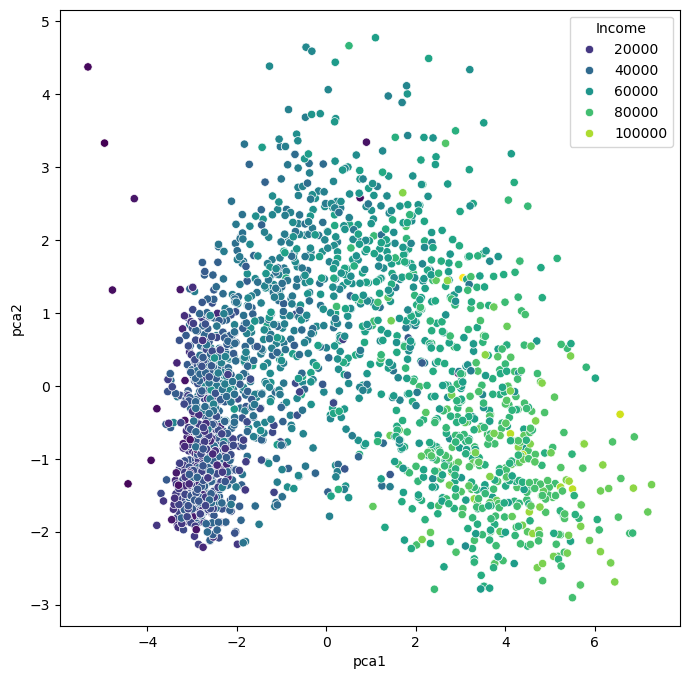

In [13]:
import seaborn as sb

data_plot = data.copy()
data_plot[["pca1", "pca2"]] = X_pca

fig, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=data_plot,
                x="pca1",
                y="pca2",
                hue="Income",
                palette="viridis")
plt.show()

We can, obviously, freely choose which feature we want to use for coloring. It is also possible to add another feature for scaling the size of the dots.

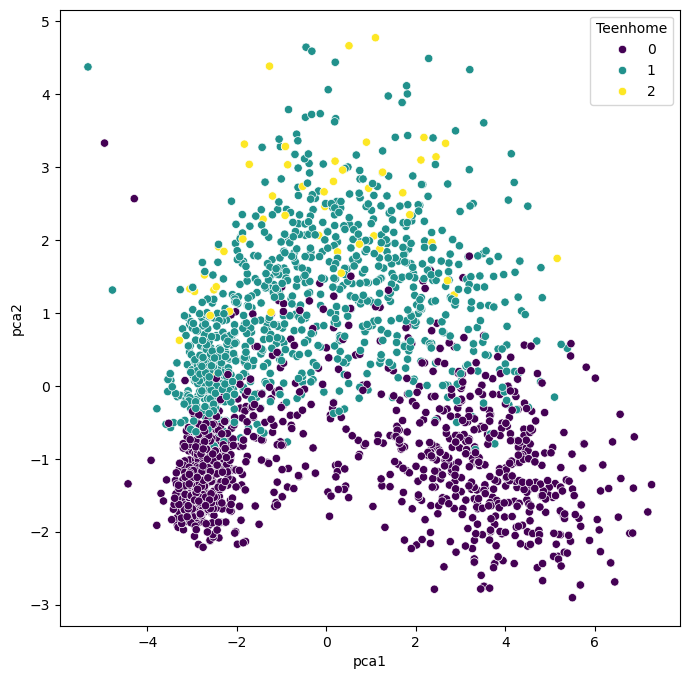

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=data_plot,
                x="pca1",
                y="pca2",
                hue="Teenhome",
                palette="viridis")
plt.show()

### Non-linear Projections

The PCA plots above show that the dimensionality reduction worked to quite some extent. How do we know this? Well, first we see that the points are not randomly distributed without any visible correlation to their features. We see that high- and low-income people are placed in different areas of the plot, and the same is true for other features as well.

Still, in many cases, PCA might not provide the best possible results. Mostly because of its main limitation: being a linear method. This can be seen particularly well in the plot, which uses the income for the dot color. This clearly shows a clear overall direction from low to high incomes.

**Why is this a problem?**  
A lot of data we care about is highly non-linear. And linear methods are then often not able to map the data onto fewer dimensions in an appropriate or sufficiently delicate & complex manner. In the present case, we might get the impression that the plot -while it looks nice- may not tell us a lot of new things about our data.

In such cases, it is recommended to also try non-linear approaches. First, we will stay with the projection based methods and have a look at PCA variants that can handle non-linearity to some extend, such as **kernel-PCA**.

### PCA on generated 2D test data
We will now test a few methods with strongly non-linear generated 2D data to better understand what the above mentioned limitation means.

In [15]:
# Generate fake data
np.random.seed(0)
r = np.concatenate((np.random.normal(1, 0.1, 200),
                    np.random.normal(0, 0.3, 100)))
phi = 100 * np.random.random(300)
x = r * np.cos(phi)
y = r * np.sin(phi)

labels = np.array(200*["crimson"] + 100*["teal"])
gen_data = np.stack((x/np.max(x), y/np.max(y)))

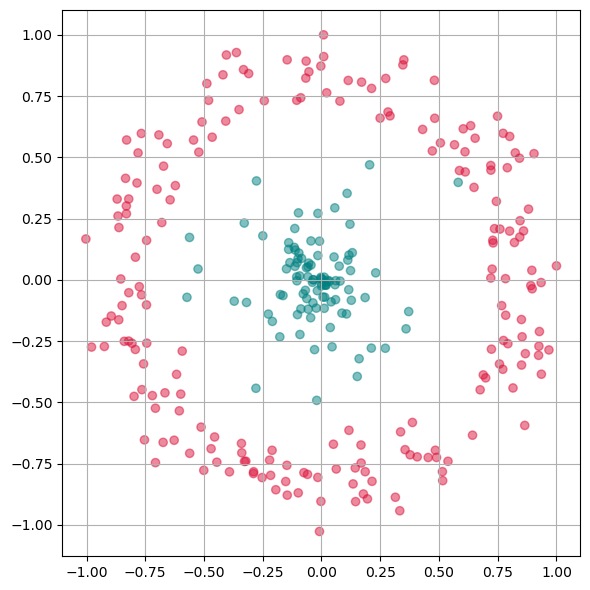

In [16]:
fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(gen_data[0], gen_data[1], alpha=0.5, c=labels)
plt.grid(True)
plt.tight_layout()
plt.show()

First we will apply **PCA** to reduce this data to one dimension.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(gen_data.T)

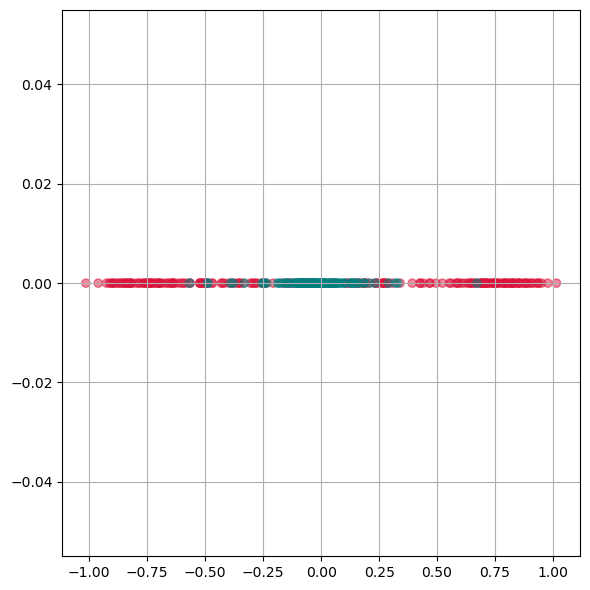

In [18]:
fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(X_pca, np.zeros(300), alpha=0.5, c=labels)
plt.grid(True)
plt.tight_layout()
plt.show()

As we see from this plot, **PCA** is not able to separate the two different colors. This means it doesn not find a good lower dimensional representation of this particular dataset.

### Kernel-PCA

Kernel-PCA processes data in a higher-dimensional space, a technique often referred to as the "kernel trick." A commonly used kernel function in this context is the Radial Basis Function (RBF).

Initially, this approach might seem counterintuitive. The objective of dimensionality reduction is to simplify data, so why first move it into a higher-dimensional space? The purpose of this step is to overcome the limitations of linear transformations, such as the principal axis transformation or rotation, found in PCA. By suitably projecting data into a higher-dimensional space, linear techniques can sometimes achieve more effective transformations, offering a more nuanced understanding of complex data sets.

**Advantages:**

- A non-linear technique, capable of handling non-linear data.
- Still relatively fast compared to other non-linear methods.

**Disadvantages:**

- Requires optimization of additional parameters, such as the choice of kernel function and its parameters.
- These parameters can significantly impact the results, making the process sensitive to these settings.

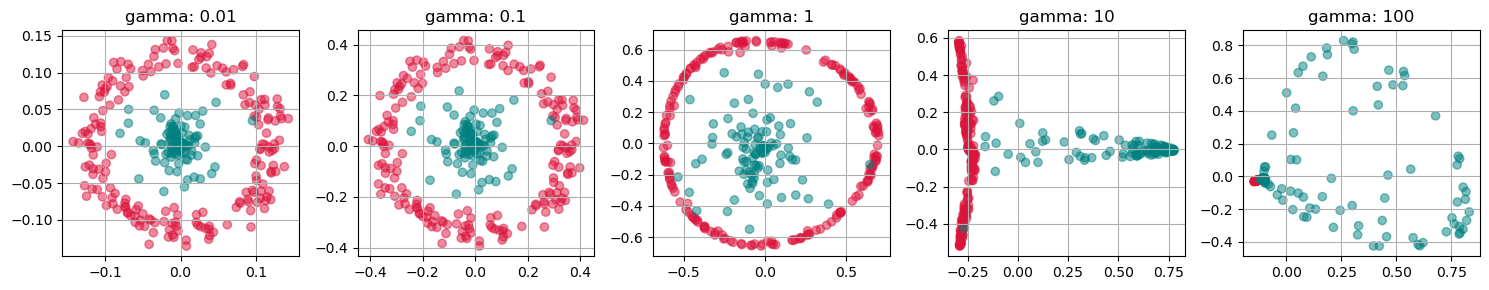

In [19]:
from sklearn.decomposition import KernelPCA

fig, axs = plt.subplots(1, 5, figsize=(15 ,3))

for i, gamma in enumerate([0.01, 0.1, 1, 10, 100]):
    kpca = KernelPCA(n_components=2, kernel="rbf",
                     gamma=gamma, random_state=42,
                     fit_inverse_transform=True, alpha=0.1)

    X_kpca = kpca.fit_transform(gen_data.T)

    axs[i].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, c=labels)
    axs[i].set_title(f"gamma: {gamma}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

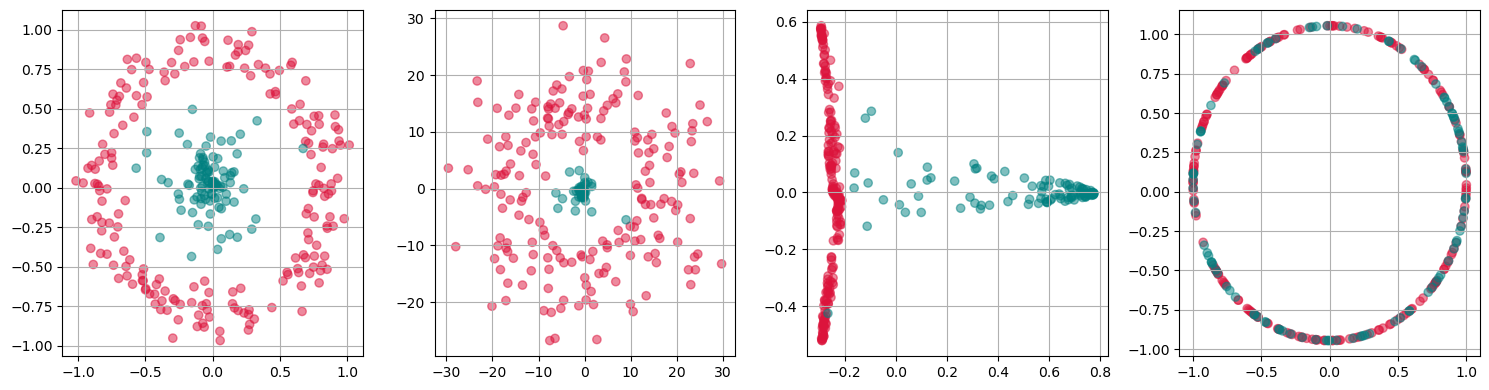

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(15 ,4))

for i, kernel in enumerate(["linear", "poly", "rbf", "cosine"]):
    kpca = KernelPCA(n_components=2, kernel=kernel,
                     gamma=10, random_state=42,
                     fit_inverse_transform=True, alpha=0.1)

    X_kpca = kpca.fit_transform(gen_data.T)

    axs[i].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, c=labels)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

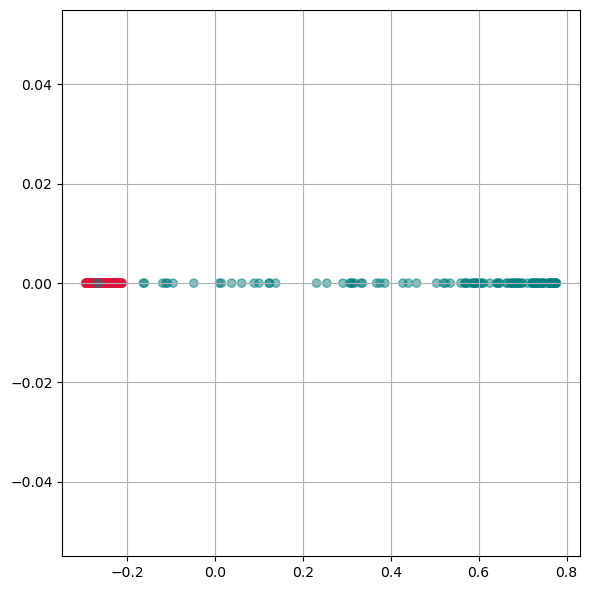

In [21]:
kpca = KernelPCA(n_components=1, kernel='rbf', 
                 gamma=10, random_state=42)
X_kpca = kpca.fit_transform(gen_data.T)

fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(X_kpca, np.zeros(300), alpha=0.5, c=labels)
ax.grid(True)
plt.tight_layout()
plt.show()

Here we see, that kernel-PCA is capable of keeping the two colors separate even after reducing all points to one dimension.

## Feature Extraction 2: Manifold Learning

Manifold Learning is a class of techniques designed for discovering the underlying structure or manifold of high-dimensional data. Unlike linear methods that attempt to preserve global linear relationships, manifold learning focuses on uncovering local structures, ideally capturing the intrinsic geometry of the data (see {numref}`fig_manifolds`). The central assumption of manifold learning is that the data of interest lies on an embedded non-linear manifold within the higher-dimensional space. By understanding this manifold, one can reduce the dimensionality while preserving the data's essential characteristics, which is particularly useful for complex datasets where linear projections like PCA fall short.

```{figure} ../images/fig_dimensionality_reduction_manifolds.png
:name: fig_manifolds

Linear projections of highly non-linear data onto fewer dimensions are often far from ideal (left). A central goal in manifold learning is to find geometries that better represent the intrinsic structure of the data (right) thereby leading to much better dimensionality reduction results.
```

### t-SNE

t-SNE, introduced by Maaten and Hinton in 2008, is a sophisticated technique that has rapidly gained popularity for its effectiveness in visualizing and reducing the dimensions of data that reside on complex manifolds {cite}maaten2008tsne. Unlike PCA, t-SNE is particularly suited for embedding high-dimensional data into a space of two or three dimensions, which makes it an excellent tool for visualizing data clusters.

**Advantages:**

- **Handling Non-Linearity**: t-SNE excels in managing non-linear relationships in data, making it ideal for datasets where the underlying structure is intricate.
- **Superior Visualization**: It produces visually appealing results that highlight clusters and structures that are not apparent in linear dimensionality reduction outputs.

**Disadvantages:**

- **Computational Intensity**: The technique is computationally intensive, particularly as the size of the dataset increases, making it less scalable than some linear methods.
- **Parameter Sensitivity**: t-SNE involves several hyperparameters such as the perplexity and learning rate, which require careful tuning to get meaningful results. The outcome of t-SNE can vary significantly with different settings of these parameters.

**How t-SNE Works:**

- **Probability Distributions**: t-SNE converts the distances between data points in high-dimensional space into conditional probabilities that represent similarities. The similarity of datapoint xjxj to datapoint xixi is the conditional probability that xixi would pick xjxj as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at xixi.
- **KL Divergence Minimization**: In the low-dimensional space, t-SNE similarly creates a probability distribution using a Student's t-distribution to model the similarity between points. The optimization objective is to minimize the Kullback–Leibler divergence between the two distributions over the positions of points in the low-dimensional space. This divergence measures how much one probability distribution differs from a second, reference probability distribution.

**Practical Considerations:**

- **Data Scaling**: Similar to PCA, data should be scaled (standardized) before applying t-SNE to ensure that all features contribute equally.
- **Dimensionality Curse**: Although t-SNE is designed for high-dimensional data, excessively high dimensions can degrade its performance, often necessitating the use of an initial dimensionality reduction method like PCA before applying t-SNE.

By focusing on local rather than global relationships, t-SNE can uncover intricate patterns in the data, making it highly suitable for exploratory data analysis and data visualization in tasks where understanding the data's grouping and structure is crucial.

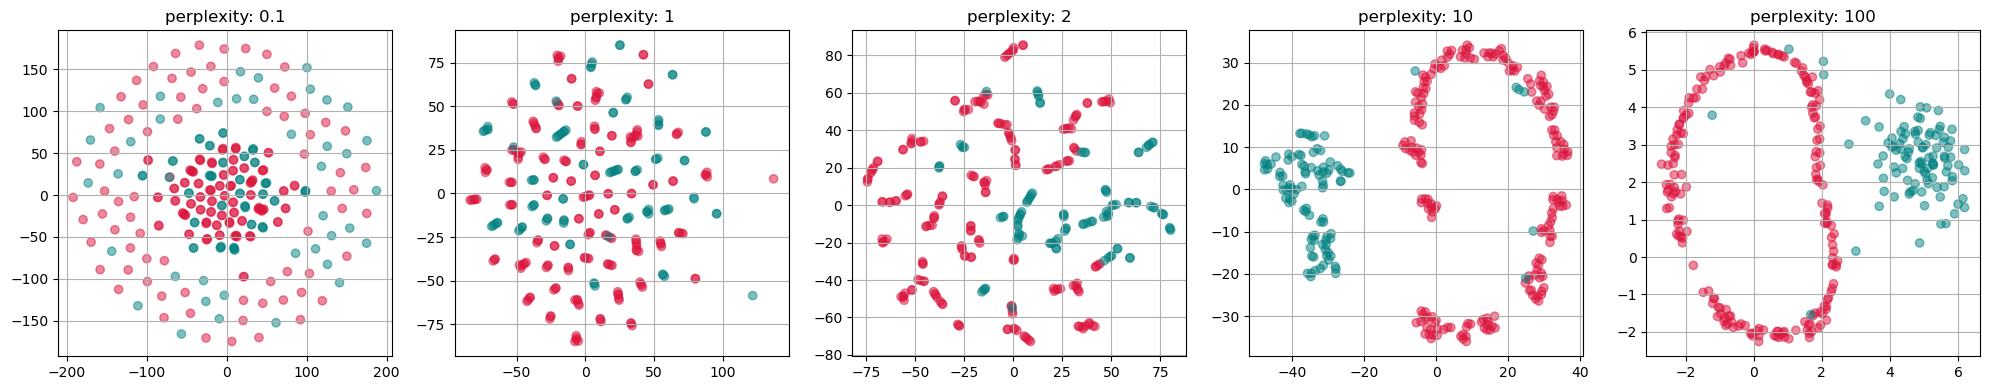

In [22]:
from sklearn.manifold import TSNE

perplexities = [0.1, 1, 2, 10, 100]
fig, axs = plt.subplots(1, len(perplexities), figsize=(4*len(perplexities) ,4))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, init="random")
    X_tsne = tsne.fit_transform(gen_data.T)

    axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c=labels)
    axs[i].set_title(f"perplexity: {perplexity}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)

UMAP is a relatively recent addition to dimensionality reduction techniques {cite}`mcinnes2018umap`. It is particularly effective for large datasets and is known for preserving more of the global data structure compared to methods like t-SNE.

**Advantages:**

- Efficient with large datasets.
- Preserves more global structure, providing a broader view of data relationships.
- Flexible and can be used in a variety of contexts.

**Disadvantages:**

- Like other non-linear methods, it requires parameter tuning.
- The results can be highly sensitive to these parameter choices.

### Comparison and Application

Each of these techniques has unique strengths and weaknesses, making them suitable for different types of data and objectives. Kernel-PCA is a versatile tool for moderately complex data, while t-SNE and UMAP excel at revealing intricate structures in high-dimensional data.

The choice of technique depends on the specific requirements of the analysis, such as the need for speed (favoring Kernel-PCA), detail (favoring t-SNE), or a balance of structure preservation and speed (favoring UMAP). Understanding the nature of the dataset and the goals of the analysis is key to selecting the most appropriate dimensionality reduction method. 

For even more techniques, see for instance {cite}`anowar2021conceptual` or {cite}`wang2021dimensionreduction`.

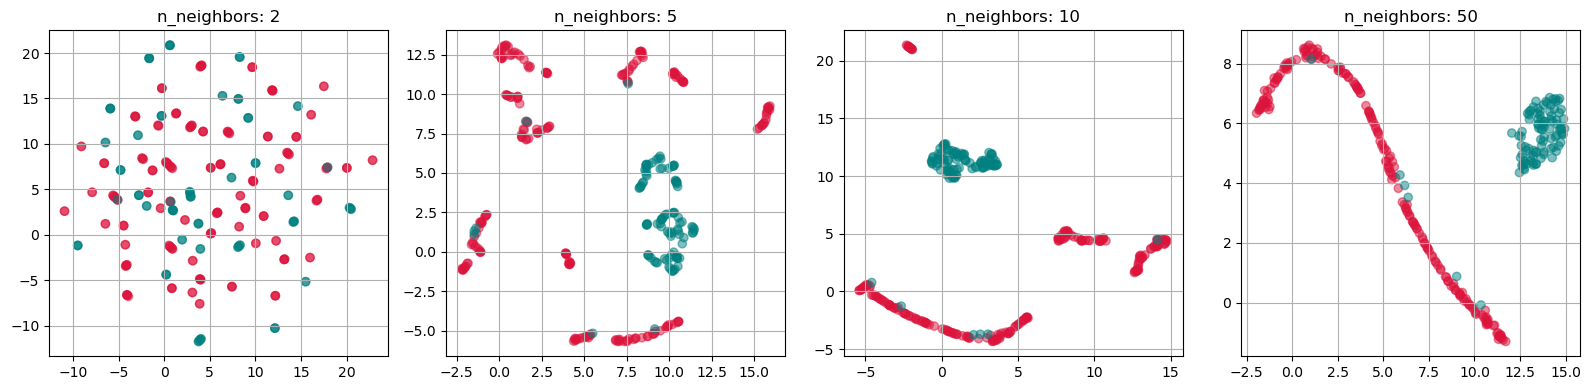

In [24]:
import umap

n_neighbors_values = [2, 5, 10, 50]
fig, axs = plt.subplots(1, len(n_neighbors_values), figsize=(4 * len(n_neighbors_values), 4))

for i, n_neighbors in enumerate(n_neighbors_values):
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, init="random")
    X_umap = reducer.fit_transform(gen_data.T)

    axs[i].scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5, c=labels)
    axs[i].set_title(f"n_neighbors: {n_neighbors}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### Use case: Marketing Analysis (t-SNE)
Let us now continue with our use case of the marketing dataset. Before we used PCA which did work to some extent, but maybe not as well as we wanted. Let's compare this to using t-SNE for reducing the datapoints to only two dimensions so that we can visualize all data points in a 2D scatter plot.

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=50,
           random_state=0)
X_tsne = tsne.fit_transform(data_scaled)

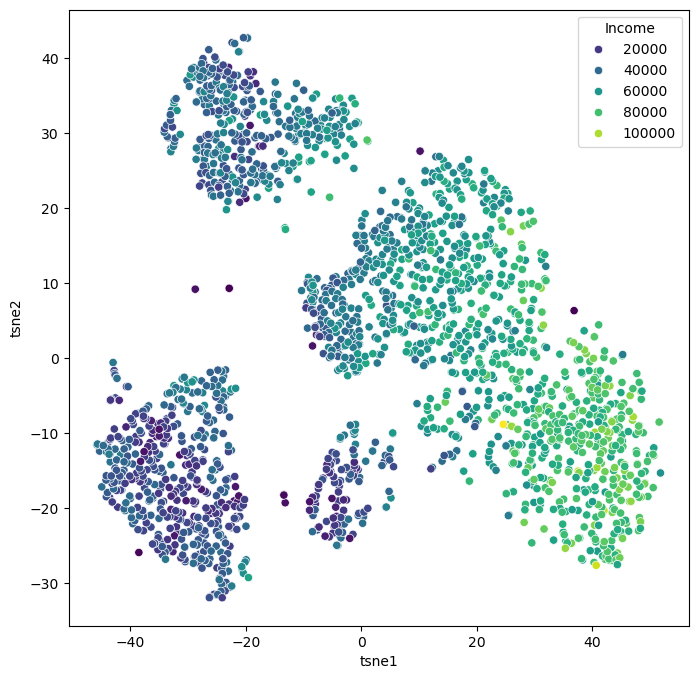

In [38]:
data_plot[["tsne1", "tsne2"]] = X_tsne


fig, ax = plt.subplots(figsize=(8, 8))
sb.scatterplot(data=data_plot,
                x="tsne1",
                y="tsne2",
                hue="Income",
                palette="viridis")
plt.show()

We can of course, also plot several features in parallel by combining multiple plots.

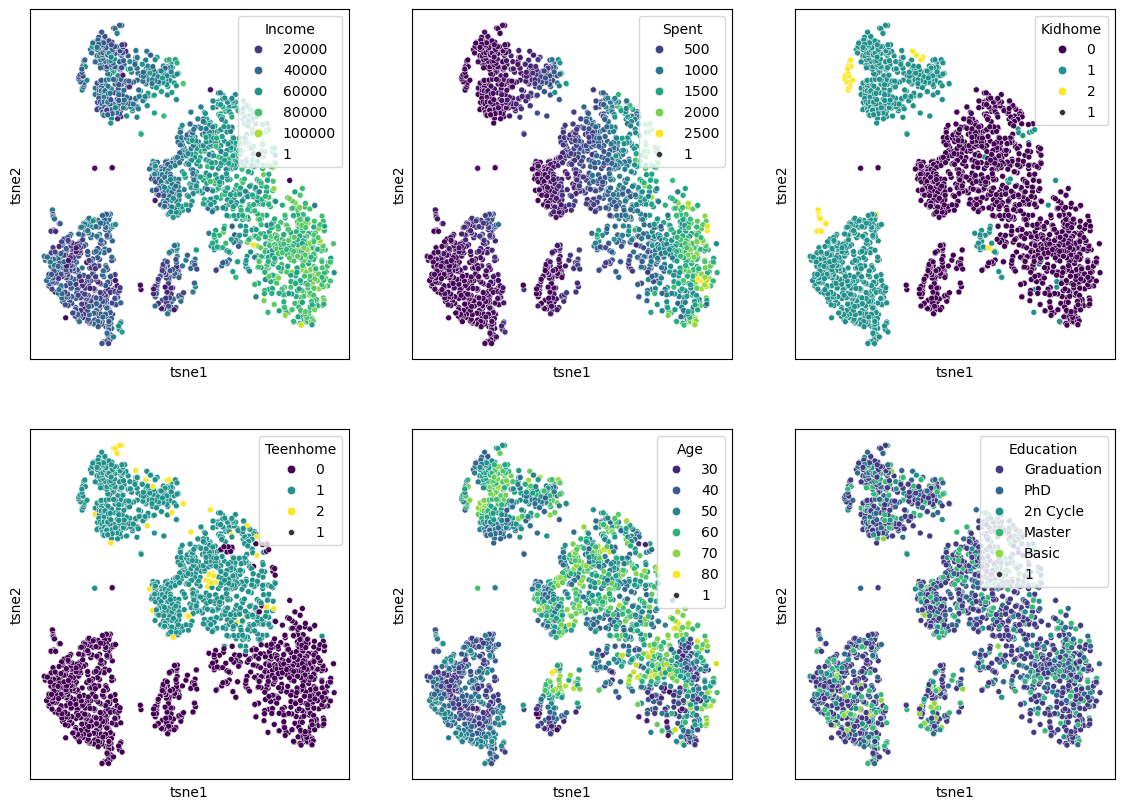

In [40]:
features = ["Income", "Spent", "Kidhome", "Teenhome", "Age", "Education"]

fig, axes = plt.subplots(2, 3, figsize=(14, 10))

for i, ax in enumerate(axes.reshape(-1)):
    sb.scatterplot(data=data_plot,
                   x="tsne1",
                   y="tsne2",
                   hue=features[i],
                   palette="viridis",
                   ax=ax)
    
    ax.set_xticks(ticks=[])
    ax.set_yticks(ticks=[])
plt.show()

## Conclusions
It can be hard to judge whether one particular dimensionality reduction result is better or worse than another. What should have become clear, though, is that the non-linear techniques are capable of revealing more complex relationships and patterns. In the case of the marketing data, the t-SNE result reveals a much clearer structure, suggesting different customer groups.

**Why not always use t-SNE or UMAP then?**  
While both techniques are very popular because they generally work quite well, they come with some disadvantages. All the non-linear methods presented here require additional parameters that need adjusting. This automatically brings a larger workload for us as data scientists, but it also commonly raises questions on how to best select the right parameters. Do we choose the prettiest plot or a random one, or should we define quantitative criteria? Although there is plenty of scientific literature on this, there is no common consensus on how to pick the "best" parameters.

In practice, people will often simply play around with the key parameters and pick the result that fits their story best.

Finally, performance is also a key factor!  
If the goal is a fast reduction of large sets of high-dimensional data, PCA often remains the go-to technique. And, implementations of slower tools such as t-SNE are often combined with PCA or similar methods to reduce the number of dimensions before running a computationally more expensive method.